In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("/content/glass.xlsx", sheet_name = "glass")

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [5]:
data.shape

(214, 10)

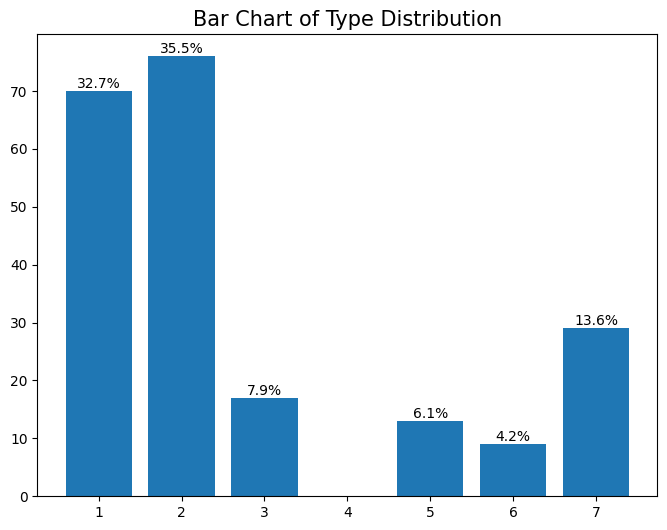

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# Use value_counts() as heights and index as labels
bars = plt.bar(data['Type'].value_counts().index, data['Type'].value_counts())
plt.title('Bar Chart of Type Distribution', fontsize=15)

# Add percentage labels manually
total = len(data['Type'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{(height / total) * 100:.1f}%', ha='center', va='bottom')

plt.show()

**Type1 and Type2 are more as compared to type3,5,6 & 7**

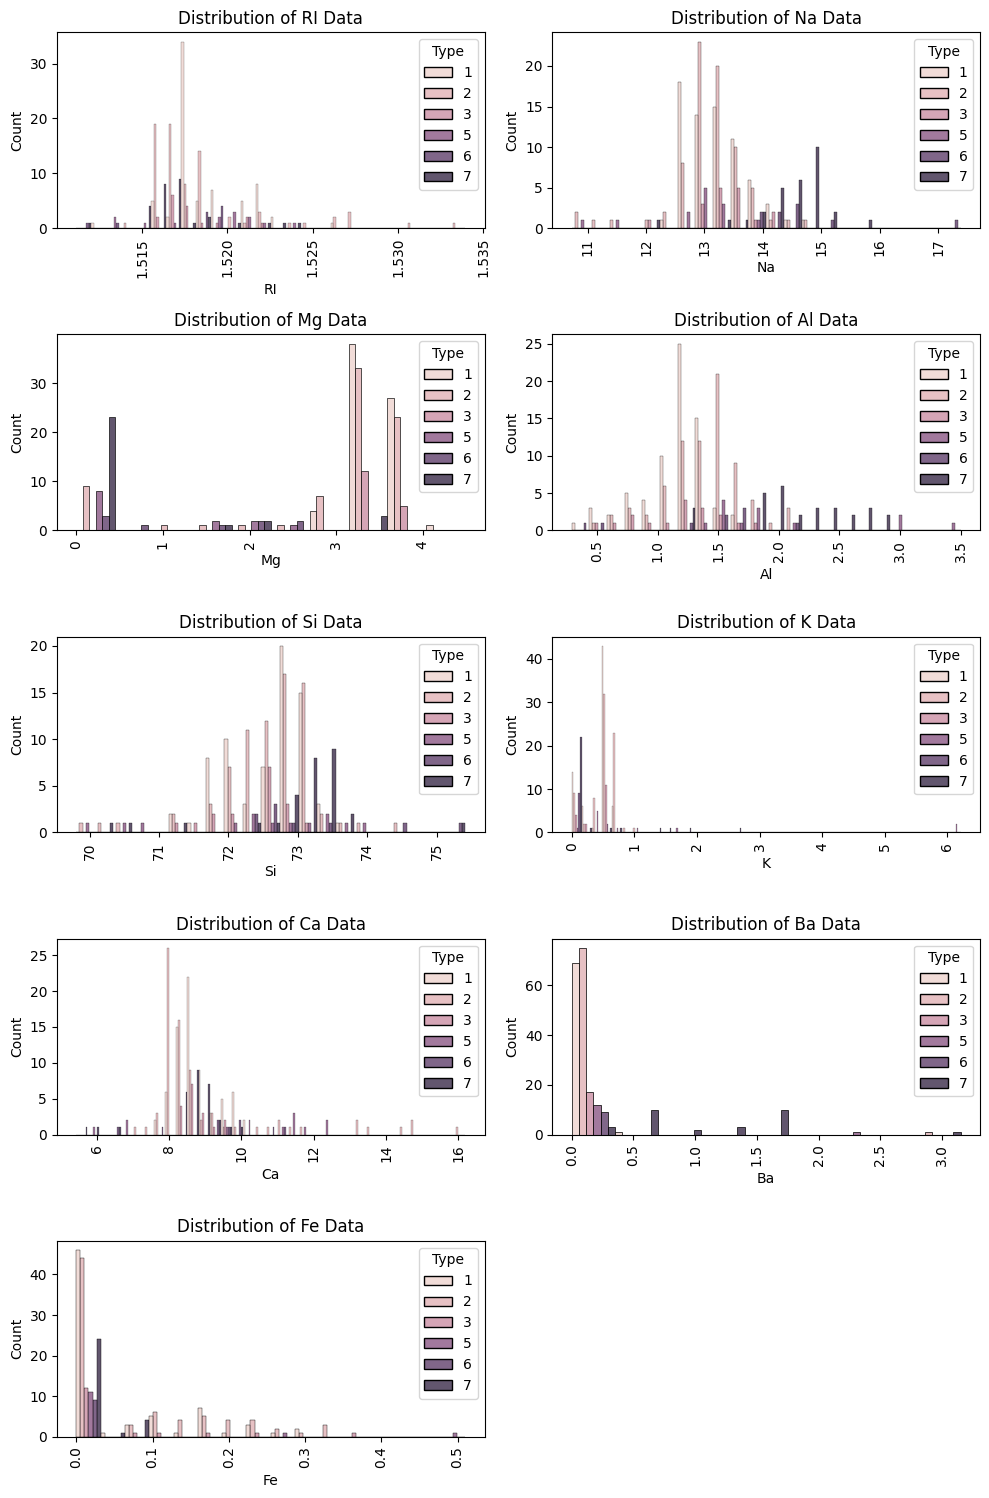

In [7]:
plt.figure(figsize = (10, 15))
for i, col in enumerate(data.columns[:-1], 1):
    plt.subplot(5, 2, i)
    sns.histplot(x = data[col], hue = data["Type"], multiple = "dodge")
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.xticks(rotation = 90)
    plt.plot()

In [8]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


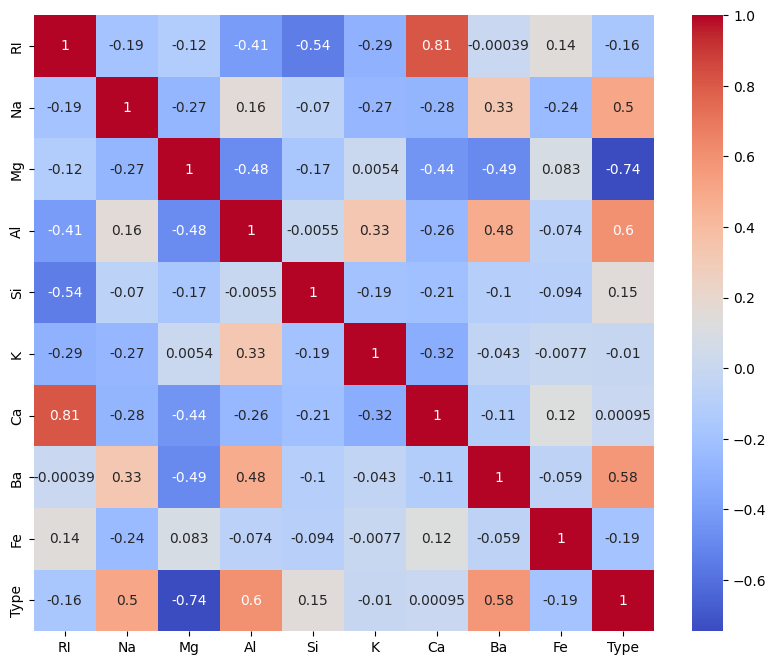

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot = True , cmap = "coolwarm")
plt.show()

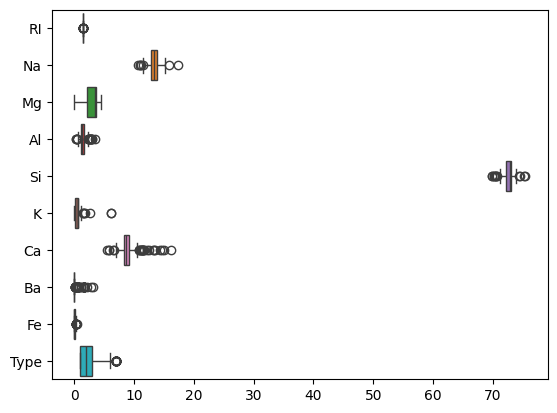

In [11]:
sns.boxplot(data, orient = "h")
plt.show()

**Our dataset is very small if we'll remove the outliers there will left no data to train the dataset.**

In [12]:
x = data.drop("Type", axis = 1)
y = data["Type"]

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data= scaler.fit_transform(x)
data = pd.DataFrame(data, columns=x.columns)


In [14]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [15]:
y

,Type
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# BAGGING

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators = 10, random_state = 42, max_samples = 0.4, max_features = 0.6, max_depth = 6)
rfr.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, max_features=0.6, max_samples=0.4,
                       n_estimators=10, random_state=42)

In [18]:
# predicting the training and test score now using MLR

# Predict on the training and test sets
y_train_pred = rfr.predict(x_train)
y_test_pred = rfr.predict(x_test)

# Calculate R-squared scores
train_score = rfr.score(x_train, y_train)
test_score = rfr.score(x_test, y_test)

print("Training score:", train_score)
print("Test score:", test_score)


Training score: 0.8596491228070176
Test score: 0.8372093023255814


**As we are increasing the estimators the difference in training and testing set is also increasing**

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.7559523809523809
Recall: 0.7261904761904763
F1-score: 0.7244444444444444


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# BOOSTING

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=100, random_state=42, learning_rate=0.1)
GBC.fit(x_train, y_train)
print("Boosting-Training score:",GBC.score(x_train, y_train))
print("Boosting-Test score:",GBC.score(x_test, y_test))


Boosting-Training score: 1.0
Boosting-Test score: 0.8604651162790697


# CONCLUSION

**BAGGING :** Model is performing good on both training and testing data.

    No overfitting

**BOOSTING :** Model is performing exceptionally good on training data but not on testing data.

    There is overfitting.